## HR Analytics Project- Understanding the Attrition in HR
### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df=pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 4\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##### Observations:
1. This shows that the dataset is imported successfully.
2. The train data consists of 1470 rows and 35 columns.
3. Name of all features and label are printed above.
4. Here, "Attrition" is label and rest are features.

Hence, reading the problem statement and observing the dataset, we concluded that this is a Classification Problem.

### Check the concise summary of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Observation:
Here we can observe that:

The columns are having two different datatypes

Datatypes -
  1. int64 (26)
  2. object (9)

## Check for null values

In [6]:
df.isnull().sum().sum()

0

The dataset contains no null values

## Check for statistical summary of the dataframe

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Checking the imbalance dataset or not

In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

There are 237 employees out of 1470 employees who left the company. 

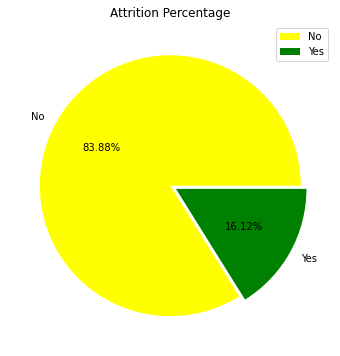

In [9]:
labels = df['Attrition'].value_counts().index
size = df['Attrition'].value_counts().values
plt.figure(figsize = (6,6))
plt.pie(size,colors = ['yellow', 'green'],explode = (0, 0.05), labels = labels,autopct = "%.2f%%")
plt.title('Attrition Percentage')
plt.legend()
plt.show()

Positive class variables are about 16.12% of data hence, our dataset is imbalanced.

In [10]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## Exploratory Data Analysis

##### Categorical Features

In [11]:
cat_features = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','TrainingTimesLastYear','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
len(cat_features)

18

Categorical features = 18

##### Numerical Features

In [12]:
num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
len(num_features)

12

Numerical features = 12

### Analyzing Categorical Features

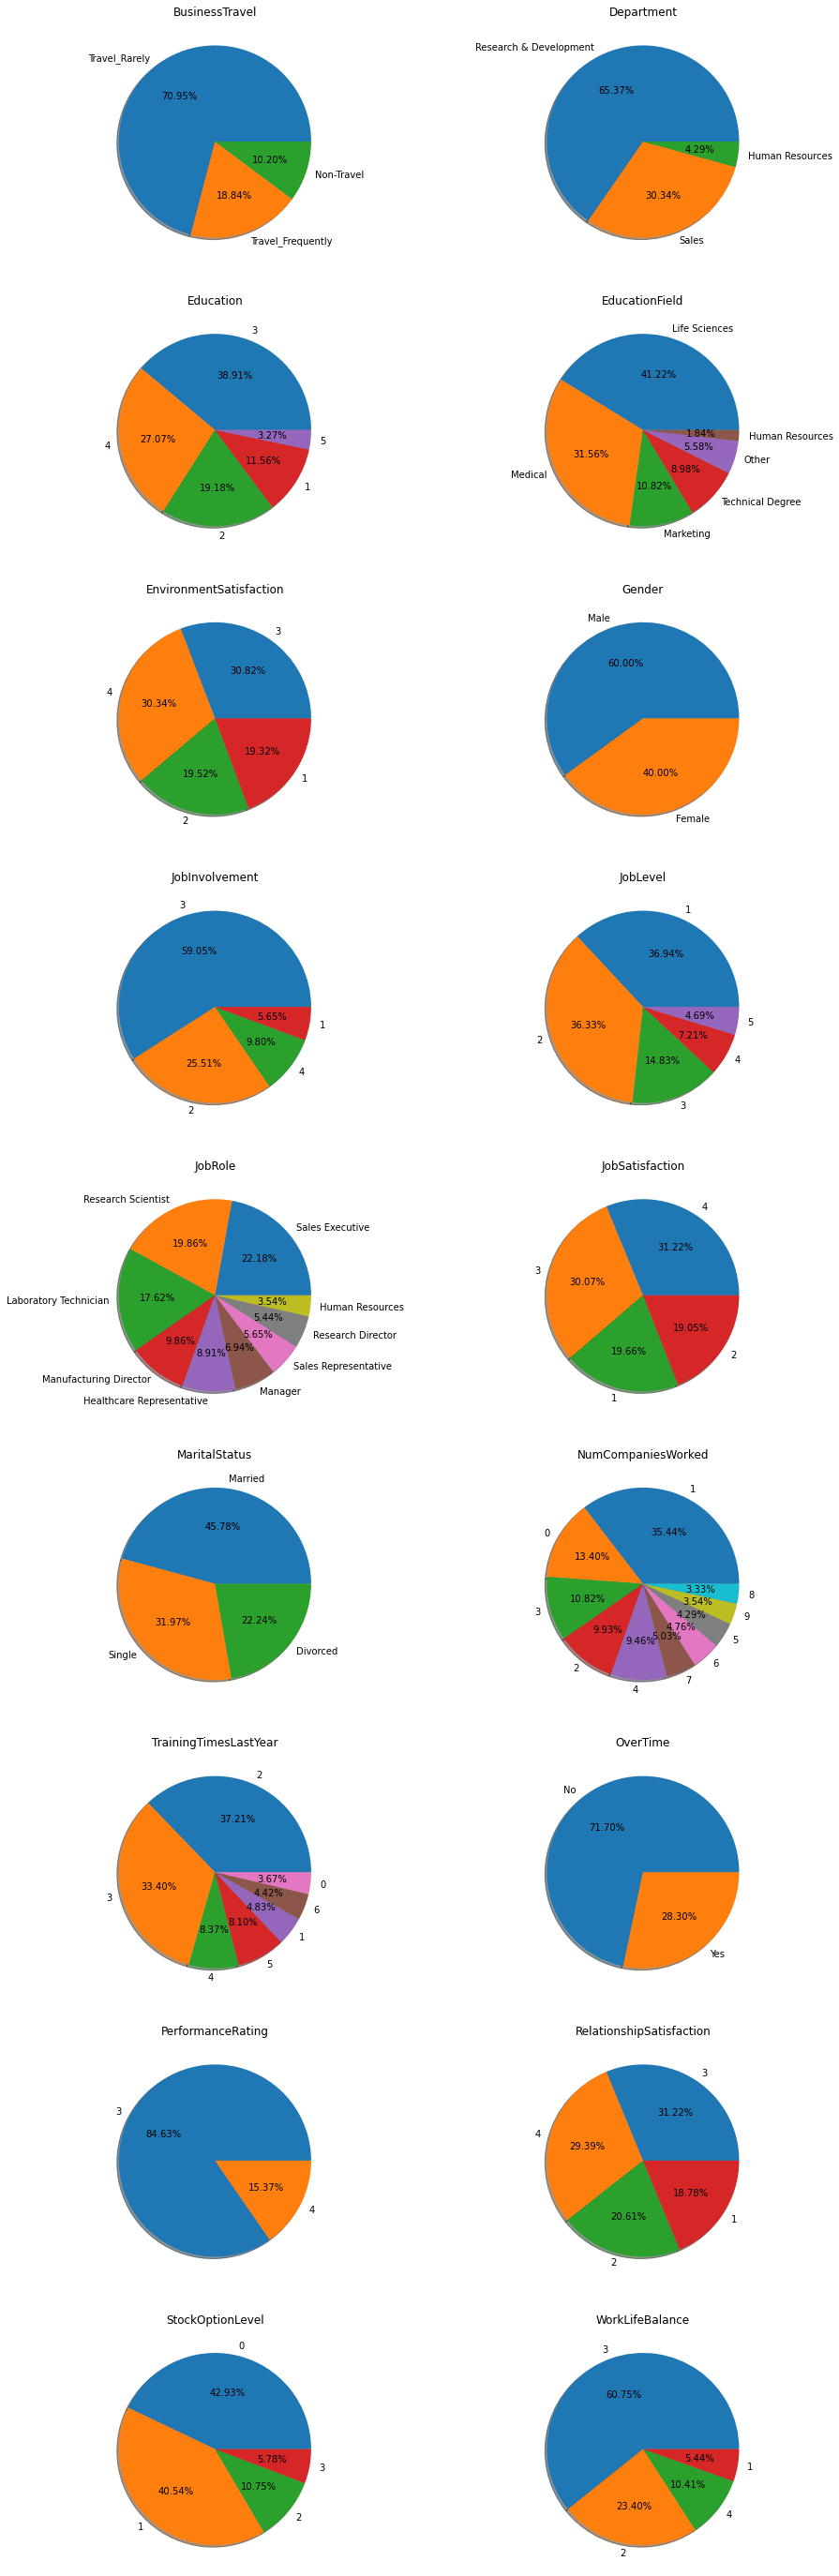

In [13]:
plt.figure(figsize = (15,50))
for i,feature in enumerate(cat_features):
    labels = df[feature].value_counts().index
    size = df[feature].value_counts().values
    ax = plt.subplot(9,2,i+1)
    ax.pie(size,labels = labels, shadow = True, autopct = "%.2f%%")
    plt.title(feature)

## Analyzing Numerical Features

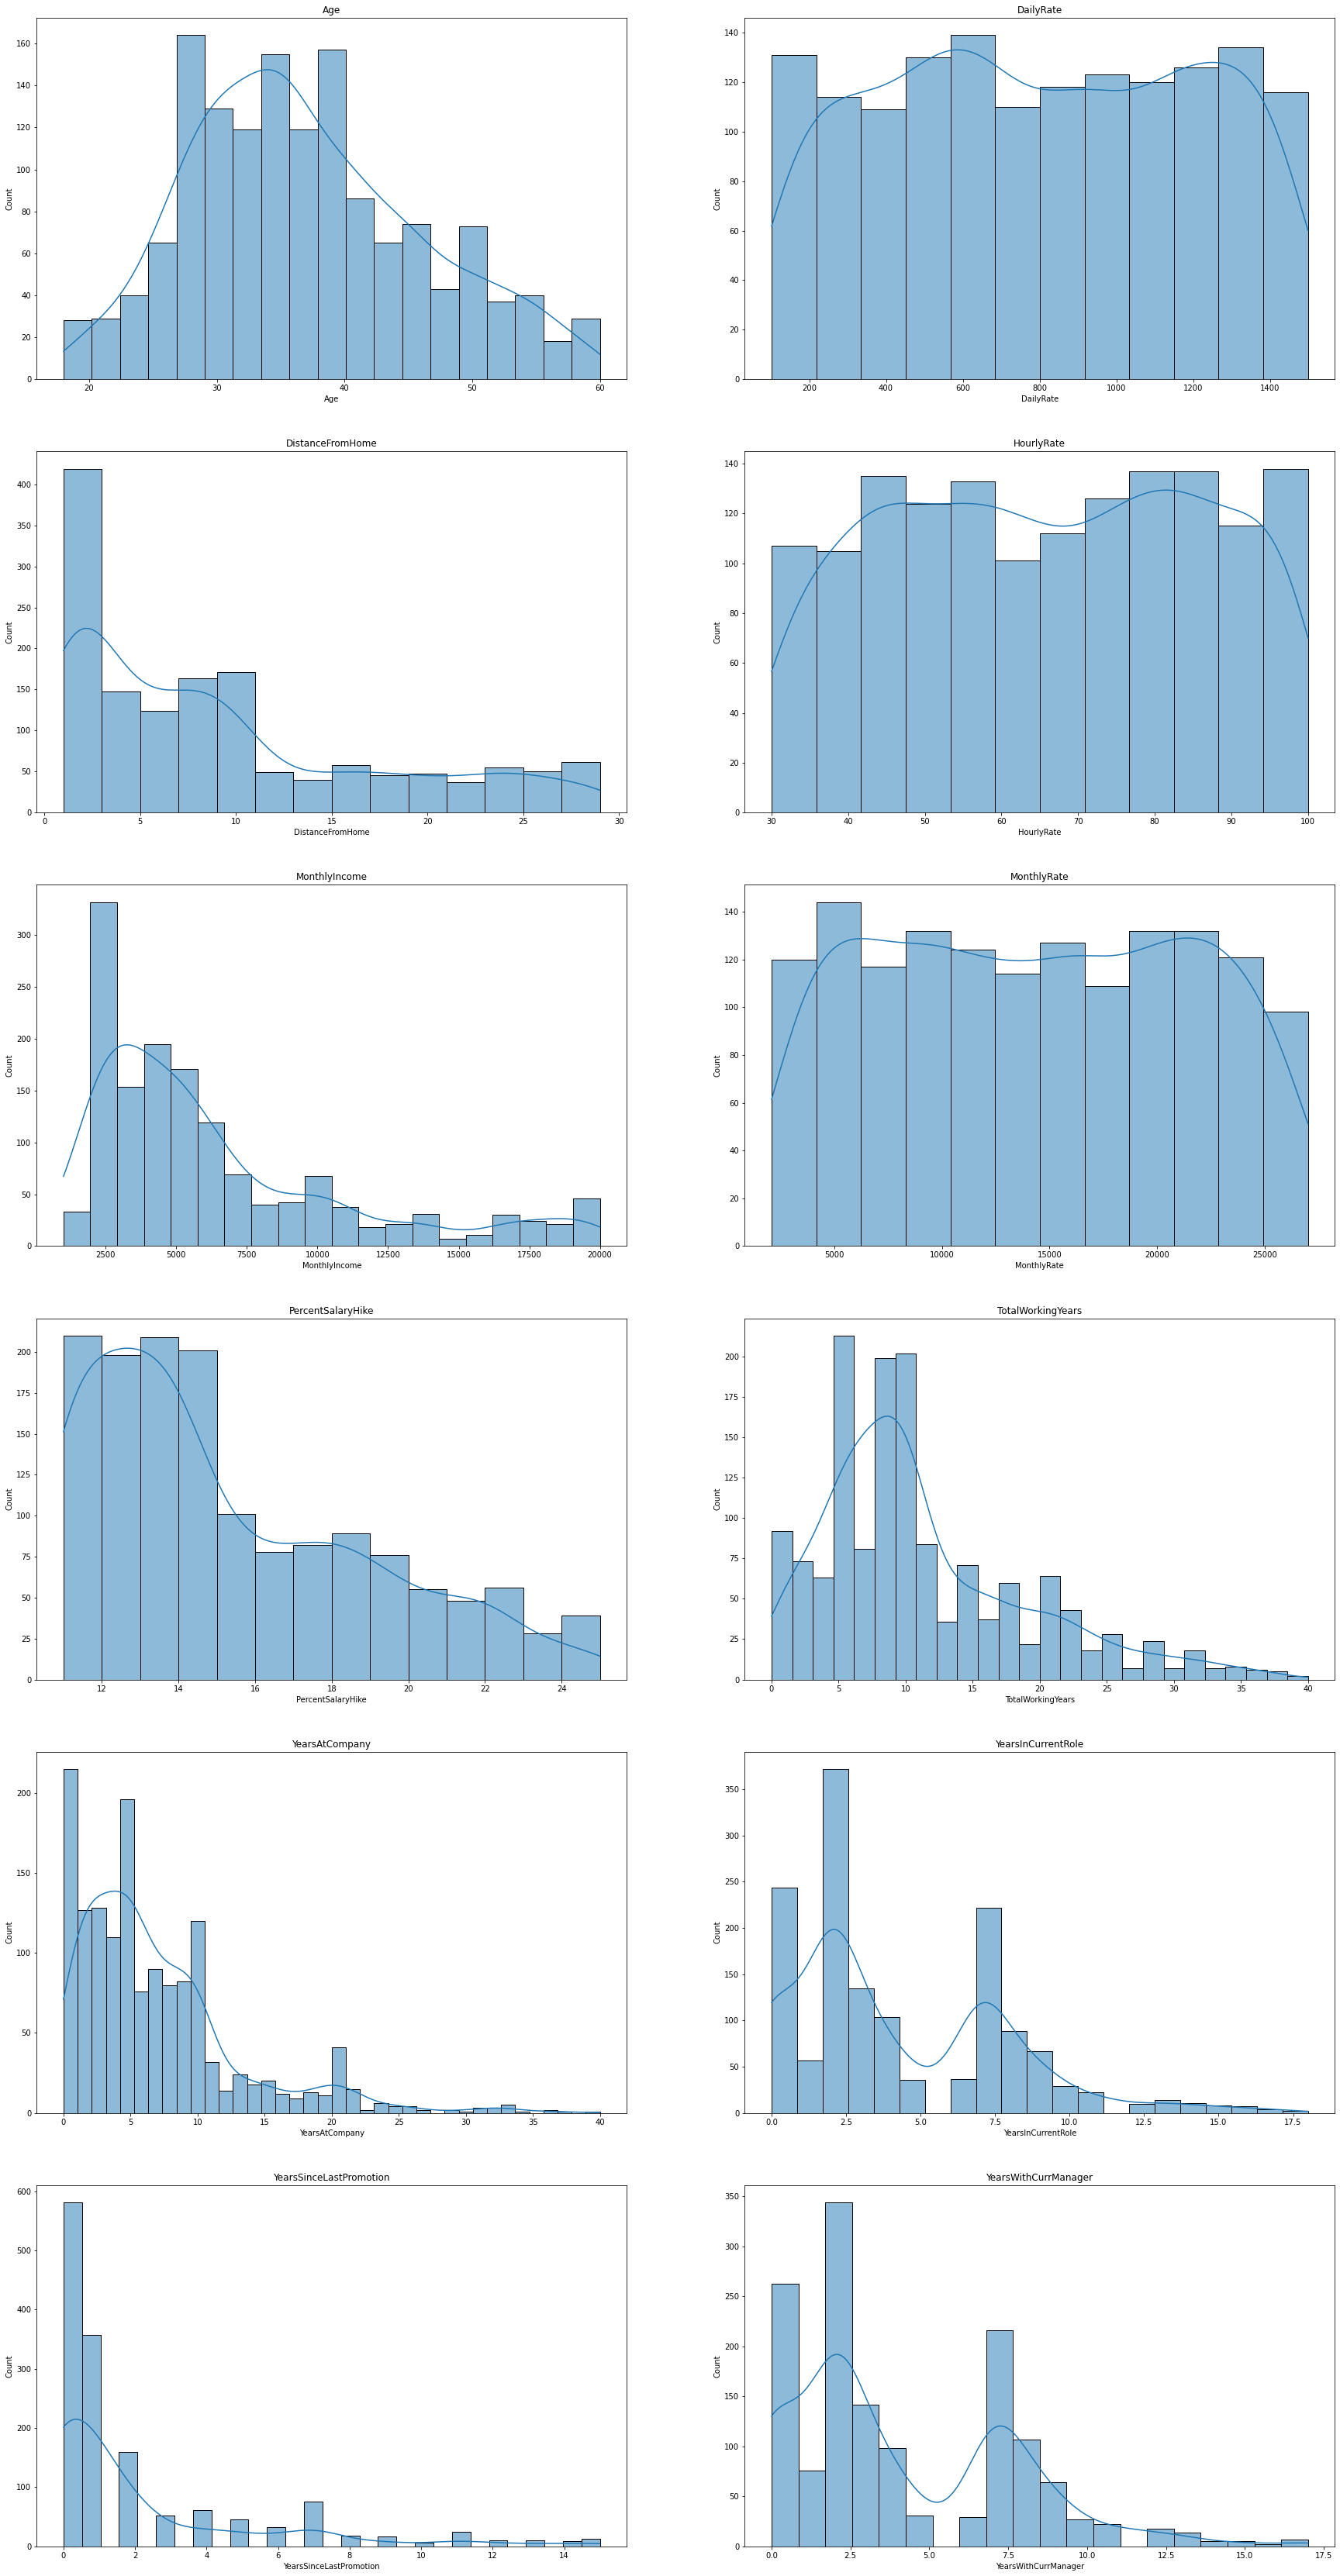

In [15]:
plt.figure(figsize = (30,60))

for i,feature in enumerate(num_features):
    ax = plt.subplot(6,2,i+1)
    sns.histplot(df[feature],kde = True)
    ax.set_title(feature)
plt.show()

Here, some features of the dataset is right-skewed

## Outliers in the dataset

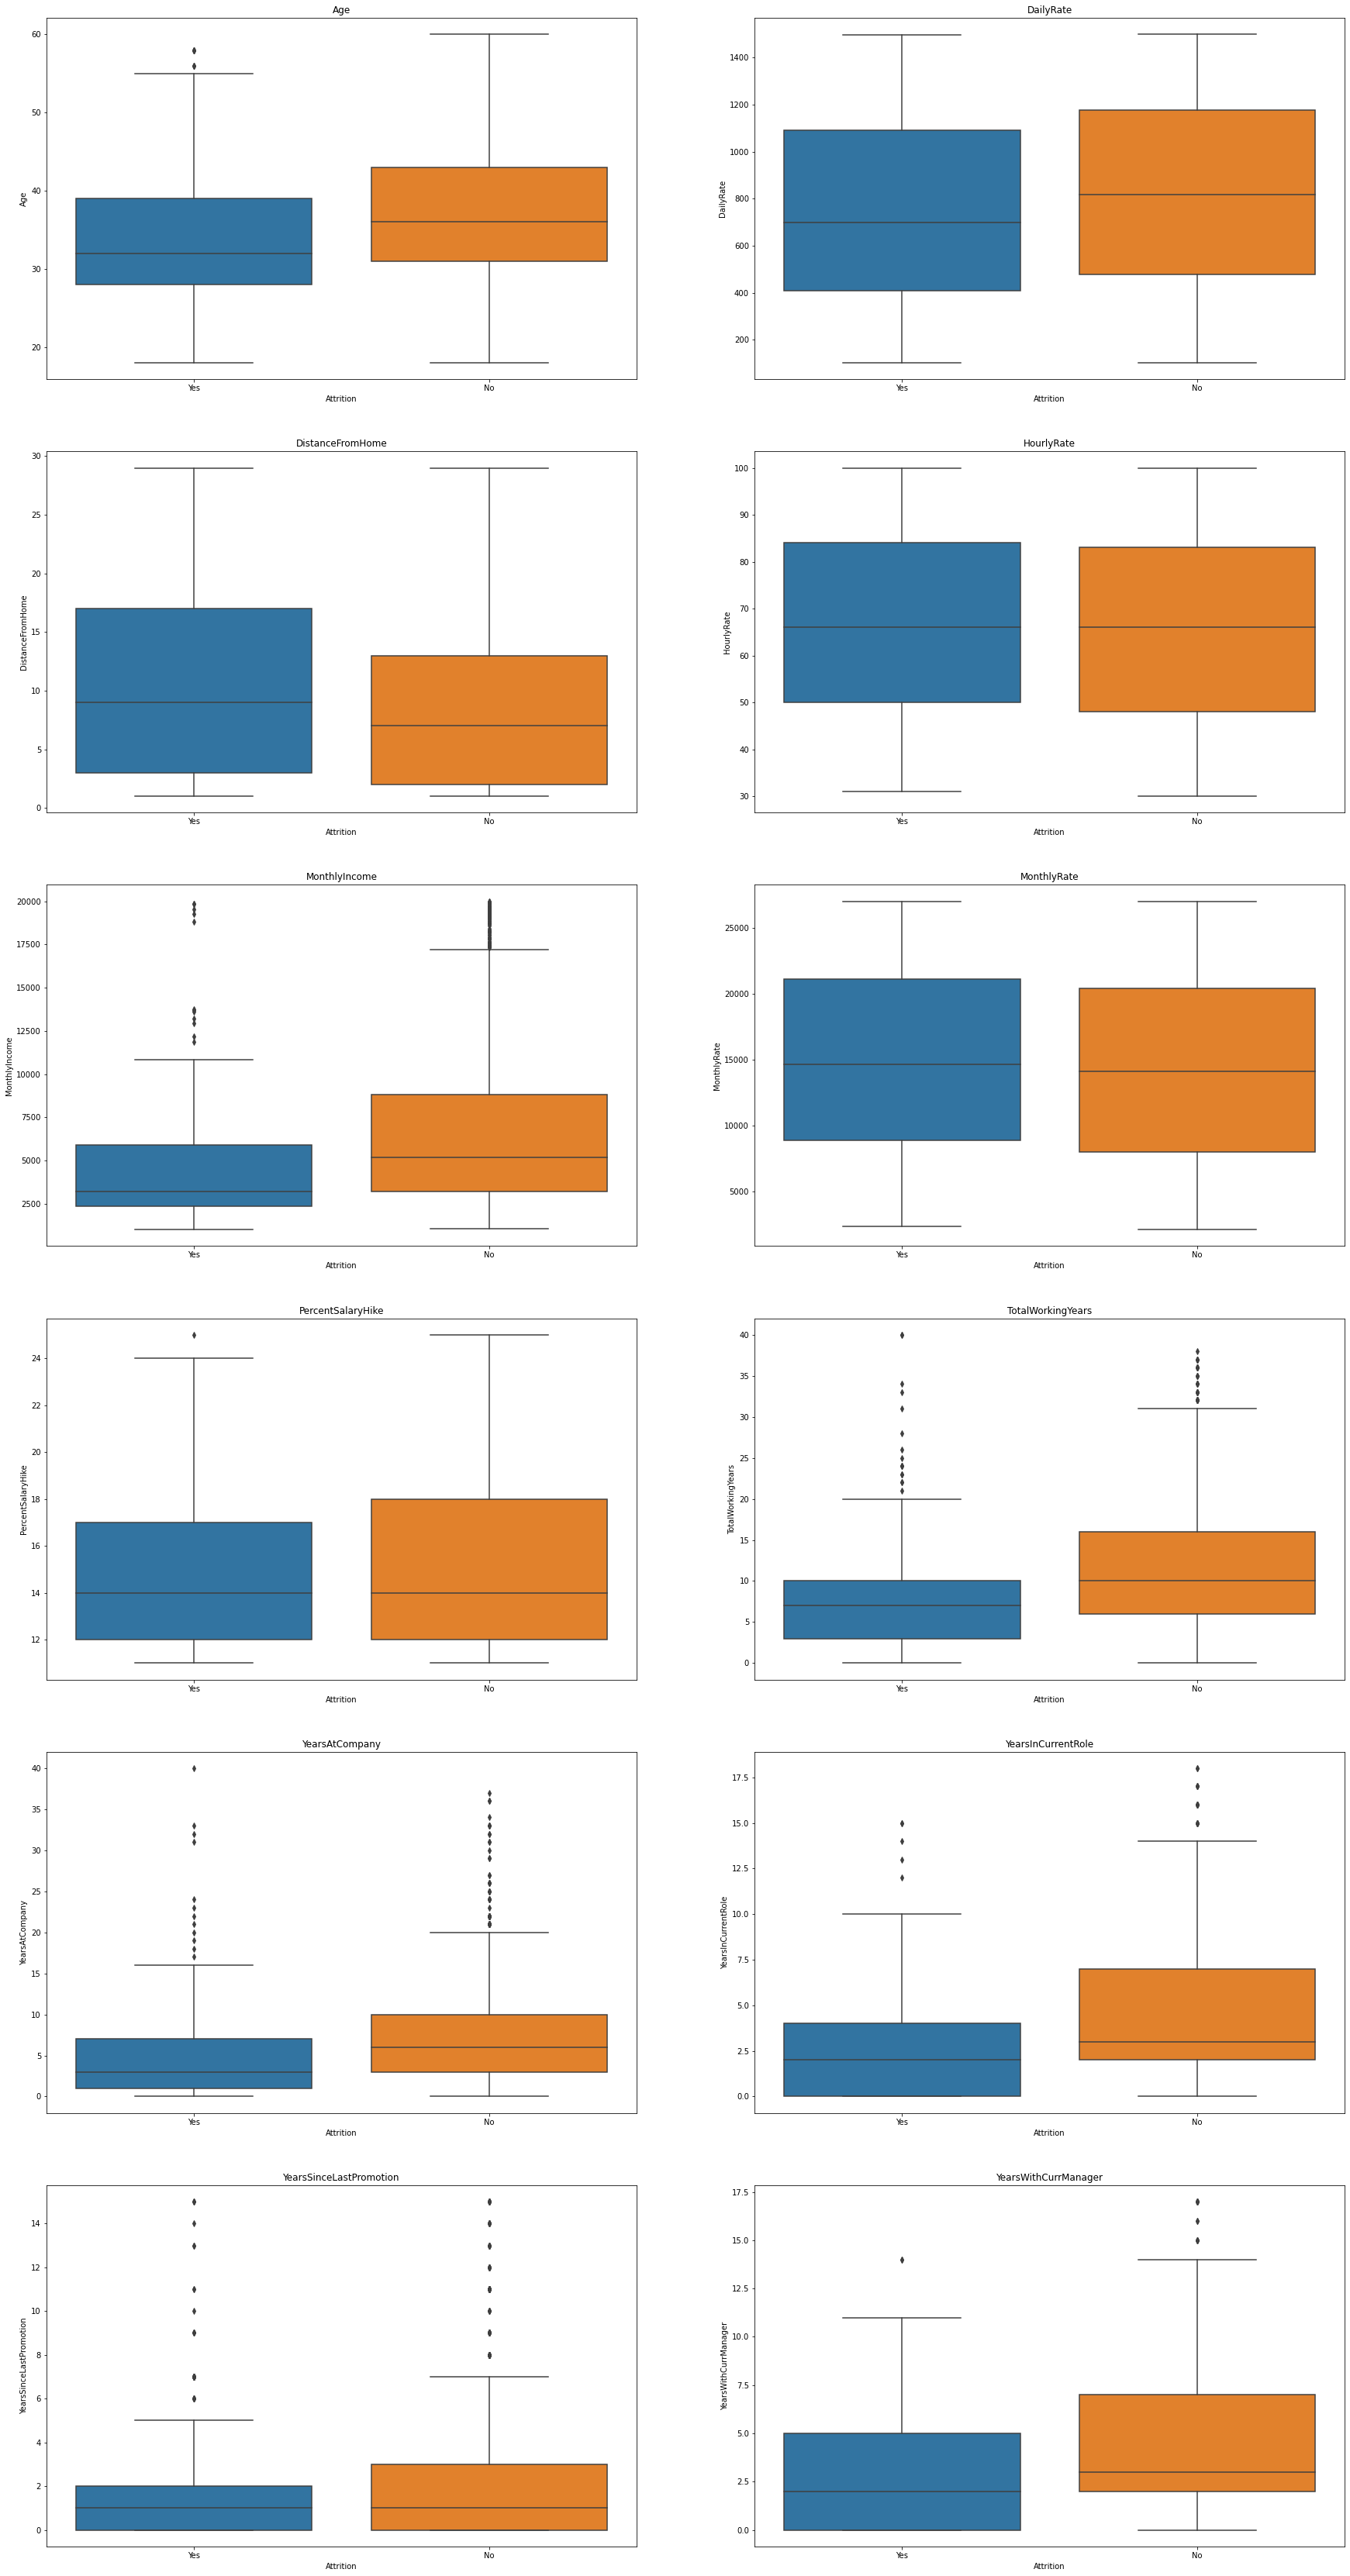

In [16]:
plt.figure(figsize = (30,60))
for i,feature in enumerate(num_features):
    ax = plt.subplot(6,2,i+1)
    sns.boxplot(y = df[feature], x = df['Attrition'])
    ax.set_title(feature)

We found that there are outliers present in the dataset.

### Numerical Features vs Attrition

##### Age 

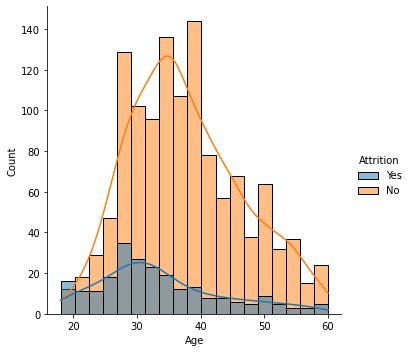

In [18]:
sns.displot(x = "Age", hue = "Attrition", data = df,kde = True)
plt.show()

##### DistanceFromHome

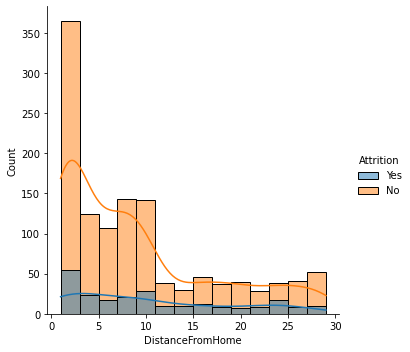

In [19]:
sns.displot(x = "DistanceFromHome", hue = "Attrition", data = df,kde = True)
plt.show()

##### MonthlyIncome

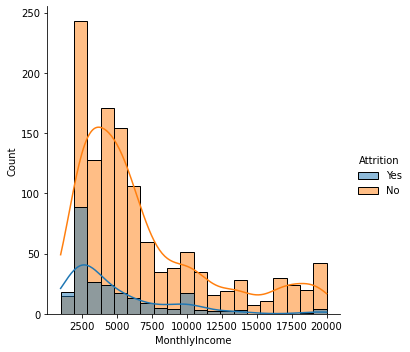

In [20]:
sns.displot(x = "MonthlyIncome", hue = "Attrition", data = df,kde = True)
plt.show()

##### PercentSalaryHike 

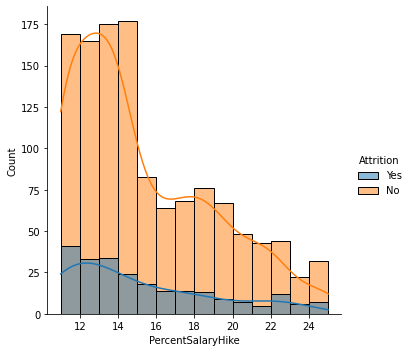

In [21]:
sns.displot(x = "PercentSalaryHike", hue = "Attrition", data = df,kde = True)
plt.show()

##### YearsAtCompany

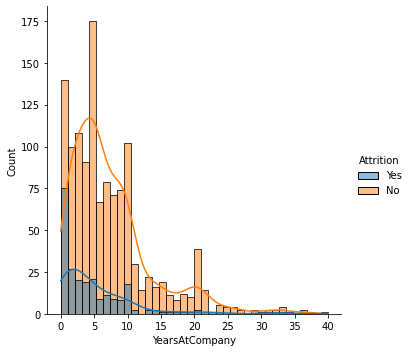

In [22]:
sns.displot(x = "YearsAtCompany", hue = "Attrition", data = df,kde = True)
plt.show()

##### YearsSinceLastPromotion 

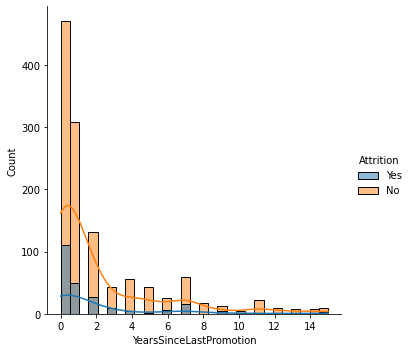

In [23]:
sns.displot(x = "YearsSinceLastPromotion",hue = "Attrition", data = df,kde = True)
plt.show()

## Categorical features v/s Attrition

##### BusinessTravel

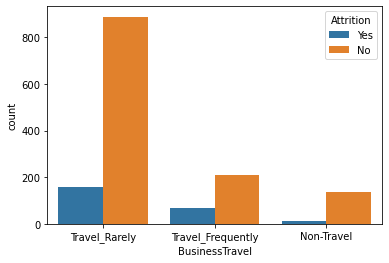

In [24]:
sns.countplot(x = "BusinessTravel",hue = "Attrition",data = df)
plt.show()

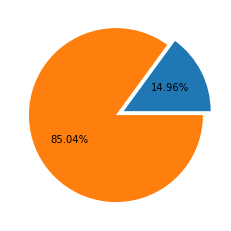

In [26]:
size = [df['BusinessTravel'][(df['Attrition'] == 'Yes') & (df['BusinessTravel'] == 'Travel_Rarely')].count(),df['BusinessTravel'][(df['Attrition'] == 'No') & (df['BusinessTravel'] == 'Travel_Rarely')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.show()

Attrition % in employees, who travel rarely or very less.

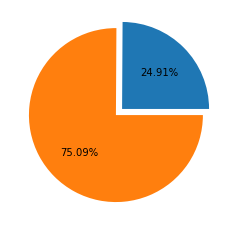

In [27]:
size = [df['BusinessTravel'][(df['Attrition'] == 'Yes') & (df['BusinessTravel'] == 'Travel_Frequently')].count(),df['BusinessTravel'][(df['Attrition'] == 'No') & (df['BusinessTravel'] == 'Travel_Frequently')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.show()

Attrition % in employees, who travel frequently

##### Department 

In [28]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

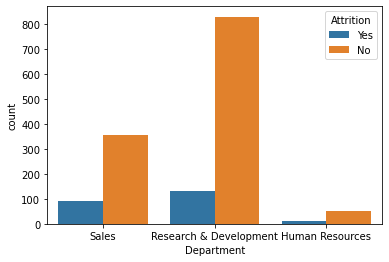

In [29]:
sns.countplot(x = "Department",hue = "Attrition",data = df)
plt.show()

##### EducationField 

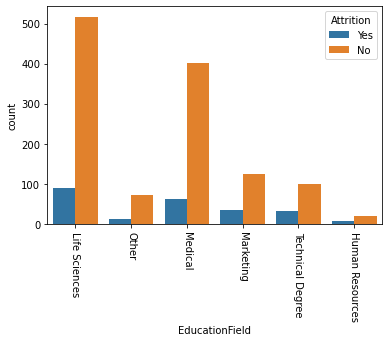

In [31]:
sns.countplot(x = "EducationField",hue = "Attrition",data = df)
plt.xticks(rotation = 270)
plt.show()

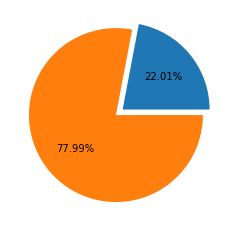

In [33]:
size = [df['EducationField'][(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Marketing')].count(),df['EducationField'][(df['Attrition'] == 'No') & (df['EducationField'] == 'Marketing')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.show()

Attrition % in employees from marketing education field

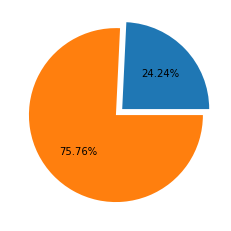

In [34]:
size = [df['EducationField'][(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Technical Degree')].count(),df['EducationField'][(df['Attrition'] == 'No') & (df['EducationField'] == 'Technical Degree')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.show()

Attrition % in employees from technical degree education field

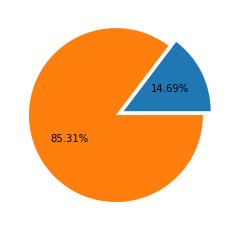

In [35]:
size = [df['EducationField'][(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Life Sciences')].count(),df['EducationField'][(df['Attrition'] == 'No') & (df['EducationField'] == 'Life Sciences')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.show()

Attrition % in employees from Life Sciences education field

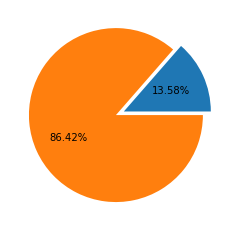

In [37]:
size = [df['EducationField'][(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Medical')].count(),df['EducationField'][(df['Attrition'] == 'No') & (df['EducationField'] == 'Medical')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%')
plt.show()

Attrition % in employees from Medical education field

##### Gender

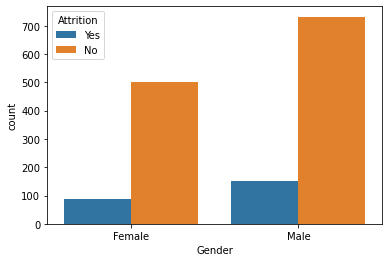

In [38]:
sns.countplot(x = "Gender",hue = "Attrition",data = df)
plt.show()

##### OverTime 

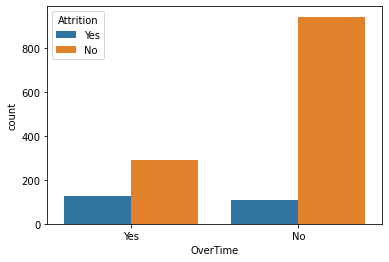

In [40]:
sns.countplot(x = "OverTime",hue = "Attrition",data = df)
plt.show()

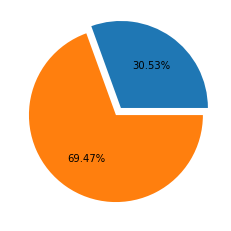

In [41]:
size = [df['OverTime'][(df['Attrition'] == 'Yes') & (df['OverTime'] == 'Yes')].count(),df['OverTime'][(df['Attrition'] == 'No') & (df['OverTime'] == 'Yes')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.show()

Attrition % in employees who do overtime

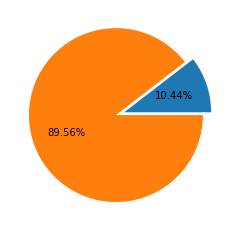

In [43]:
size = [df['OverTime'][(df['Attrition'] == 'Yes') & (df['OverTime'] == 'No')].count(),df['OverTime'][(df['Attrition'] == 'No') & (df['OverTime'] == 'No')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.show()

Attrition % in employees who do not do overtime

##### EnvironmentSatisfaction

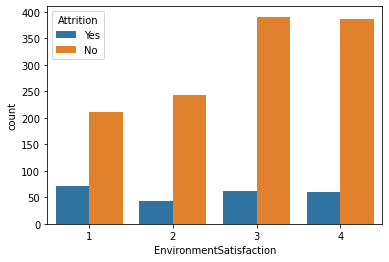

In [44]:
sns.countplot(x = "EnvironmentSatisfaction",hue = "Attrition",data = df)
plt.show()

## Feature Engineering

EmployeeCount,Over18 and StandardHours contains a single unique value so these features are not be useful for either visualization or modelling. EmployeeNumber feature is just an identifier and it's not required for modelling either.

In [45]:
df.drop(['EmployeeCount'],axis = 1, inplace = True)
df.drop(['StandardHours'],axis = 1,inplace = True)
df.drop(['Over18'],axis = 1,inplace = True)
df.drop(['EmployeeNumber'],axis = 1,inplace = True)

In [46]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Checking Correlation

In [47]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


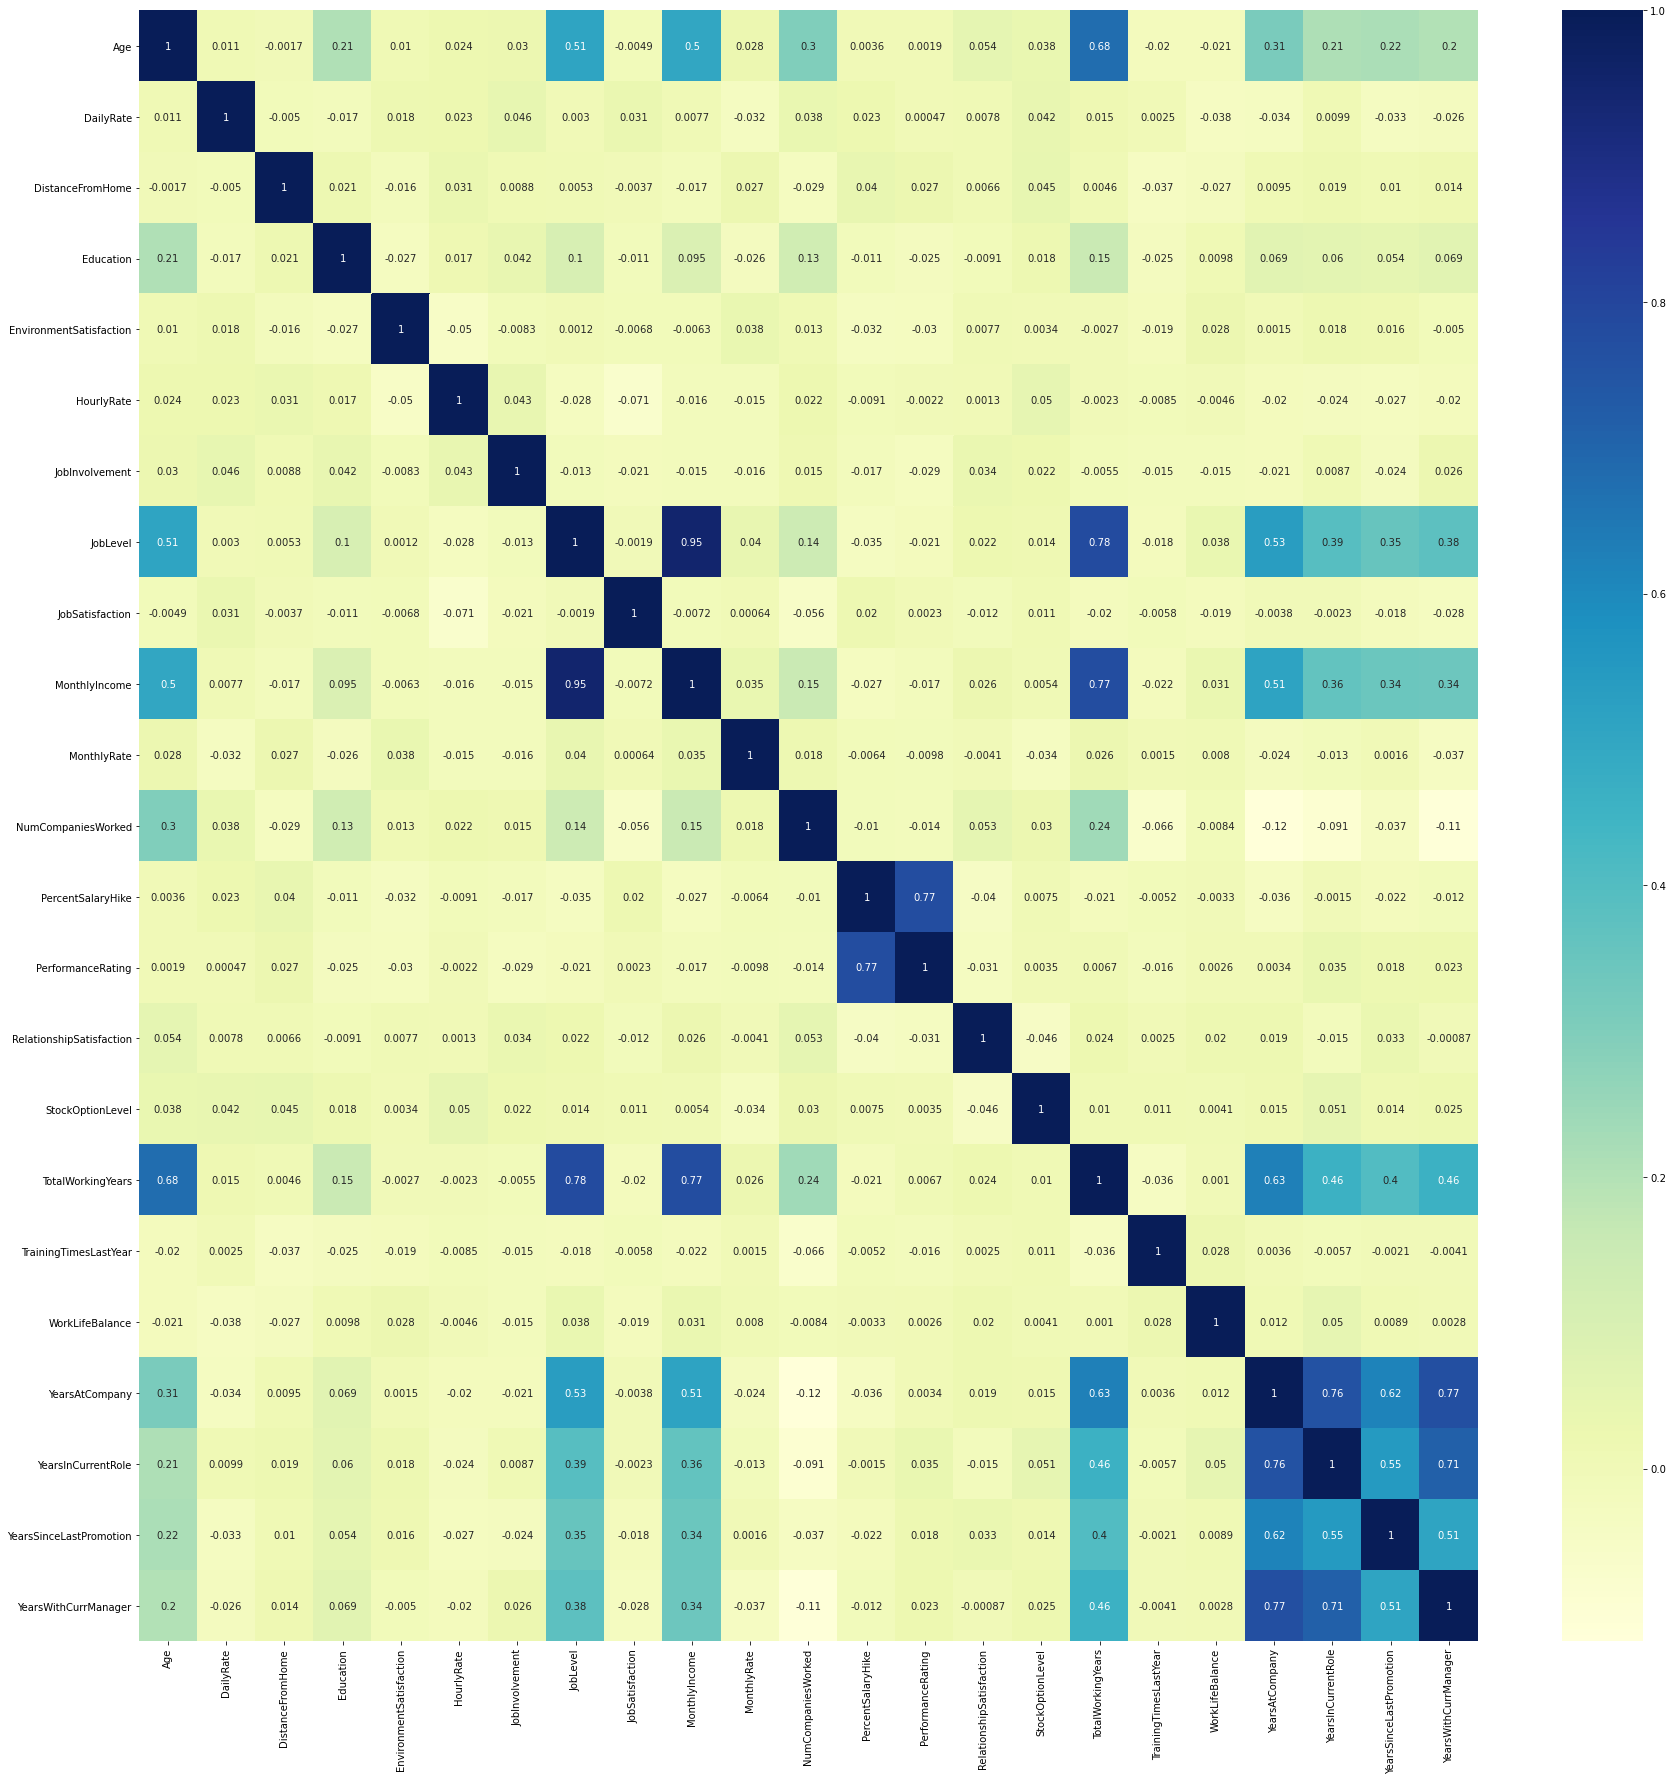

In [49]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

##### Observation
Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Highly correlated features are -:

* JobLevel and MonthlyIncome - 0.95
* JobLevel and TotalWorkingYears - 0.78
* MonthlyIncome and TotalworkingYears - 0.77
* PercentSalaryHike and PerformanceRating - 0.77
* YearsAtCompany and YearsWithCurrManager - 0.77
* YearsAtCompany and YearsInCurrRole - 0.76
* YearsInCurrentRole and YearsWithCurrentManager - 0.71
* We will drop the features which are highly correalated with each other

In [50]:
df.drop(['JobLevel'],axis = 1,inplace = True)
df.drop(['TotalWorkingYears'],axis = 1,inplace = True)
df.drop(['PerformanceRating'],axis = 1,inplace = True)
df.drop(['YearsWithCurrManager'],axis = 1,inplace = True)
df.drop(['YearsInCurrentRole'],axis = 1,inplace = True)

In [51]:
cat_features.remove('JobLevel')
cat_features.remove('PerformanceRating')

In [52]:
cat_features

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'OverTime',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [53]:
num_features.remove('TotalWorkingYears')
num_features.remove('YearsInCurrentRole')
num_features.remove('YearsWithCurrManager')

In [54]:
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

## Feature Scaling

In [55]:
le = LabelEncoder()
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])

In [56]:
sc = StandardScaler()
for feature in num_features:
    df[feature] = sc.fit_transform(np.array(df[feature]).reshape(-1,1))

In [57]:
df['Attrition'] = le.fit_transform(df['Attrition'])

In [58]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,1,2,0.742527,2,-1.010909,1,1,1,0,...,0.726020,8,1,-1.150554,0,0,0,0,-0.164613,-0.679146
1,1.322365,0,1,-1.297775,1,-0.147150,0,1,2,1,...,1.488876,1,0,2.129306,3,1,3,2,0.488508,-0.368715
2,0.008343,1,2,1.414363,1,-0.887515,1,4,3,1,...,-1.674841,6,1,-0.057267,1,0,3,2,-1.144294,-0.679146
3,-0.429664,0,1,1.461466,1,-0.764121,3,1,3,0,...,1.243211,1,1,-1.150554,2,0,3,2,0.161947,0.252146
4,-1.086676,0,2,-0.524295,1,-0.887515,0,3,0,1,...,0.325900,9,0,-0.877232,3,1,3,2,-0.817734,-0.058285


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int32  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int32  
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   int64  
 12  JobRole                   1470 non-null   int32  
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

## Train test split

In [60]:
X = df.drop(['Attrition'],axis = 1)
y = df['Attrition']

In [63]:
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


## Model Building

Following are the classification algorithms I will use to make the model:

* Logistic Regression
* Decision Trees
* Naive Bayes
* Support Vector Machines(Linear)
* Random Forest Classifier

In [64]:
accuracy=[]
mean_acc = []
classifiers=['Logistic Regression','Decision Tree','Naive Bayes','Linear SVM', 'Random Forest Classifier']
models=[LogisticRegression(),DecisionTreeClassifier(criterion = 'entropy',max_depth = 3),GaussianNB(),svm.SVC(kernel = 'linear'),RandomForestClassifier(n_estimators = 1000)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = skf,scoring = "accuracy")
    mean_acc.append(cv_result.mean())
    accuracy.append(cv_result)

## Model Evolution

### Model Accuracies

In [65]:
models_acc_df = pd.DataFrame(accuracy,index = [classifiers])
cols = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
models_acc_df.columns = cols
models_acc_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Logistic Regression,0.863946,0.850340,0.860544,0.867347,0.870748
Decision Tree,0.836735,0.836735,0.853741,0.850340,0.850340
Naive Bayes,0.894558,0.853741,0.840136,0.840136,0.850340
Linear SVM,0.836735,0.867347,0.857143,0.870748,0.860544
Random Forest Classifier,0.857143,0.860544,0.870748,0.857143,0.867347


In [66]:
models_mean_acc_df = pd.DataFrame(mean_acc,index = [classifiers])
models_mean_acc_df.columns = ['Mean Accuracy']
models_mean_acc_df

,Mean Accuracy
Logistic Regression,0.862585
Decision Tree,0.845578
Naive Bayes,0.855782
Linear SVM,0.858503
Random Forest Classifier,0.862585


### Mean Accuracy of Classification Model

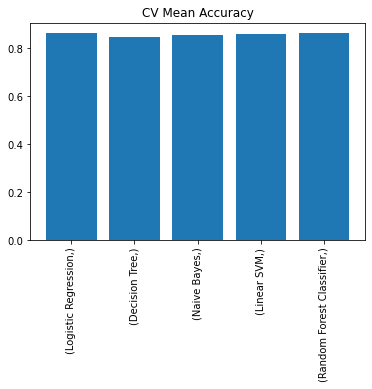

In [67]:
models_mean_acc_df['Mean Accuracy'].plot.bar(width=0.8)
plt.title('CV Mean Accuracy')
plt.show()

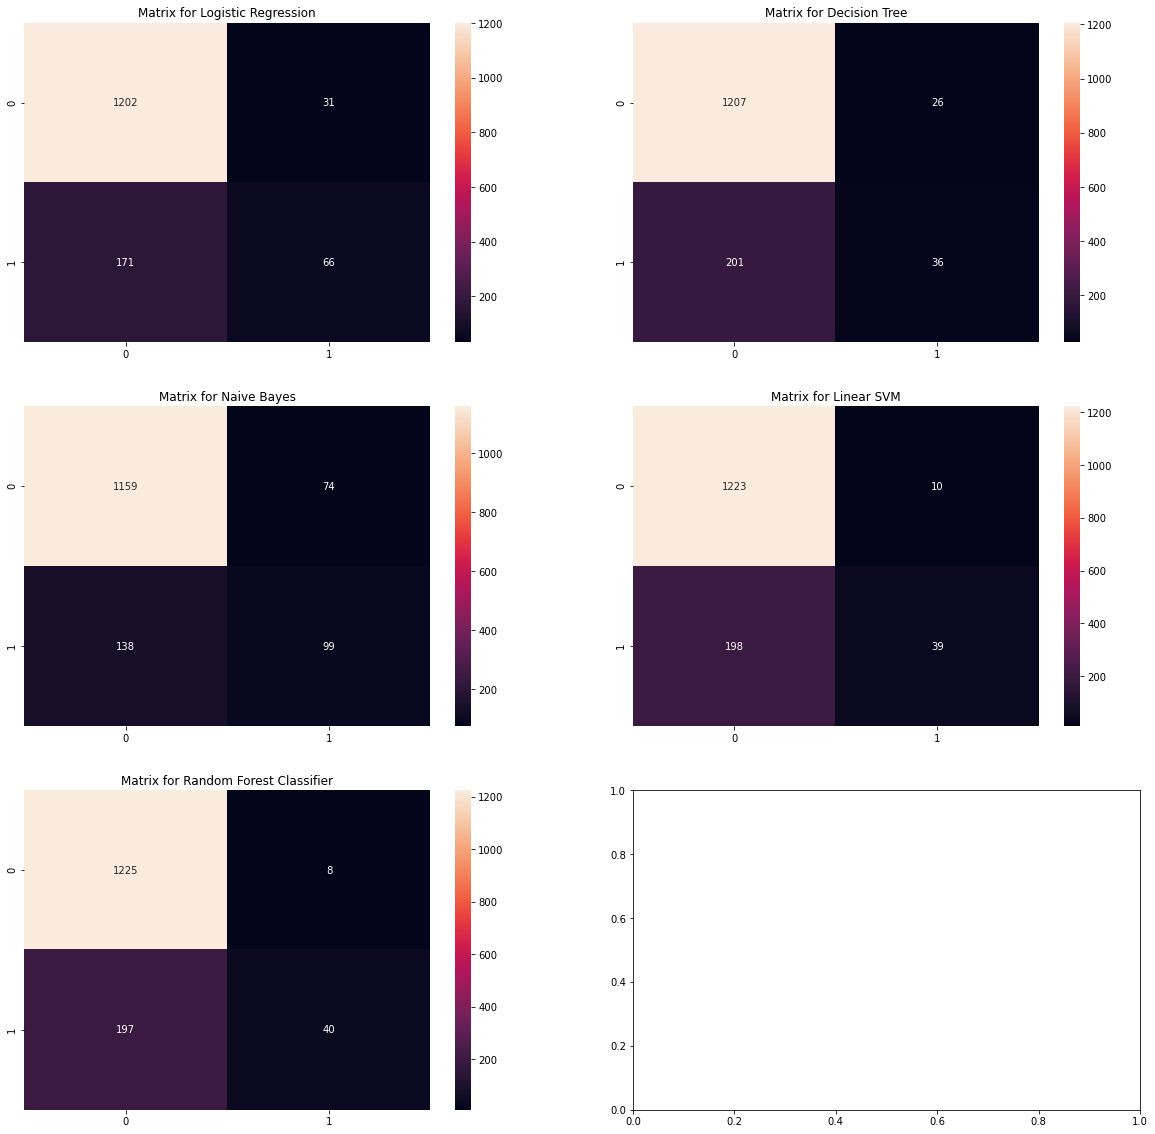

In [68]:
f,ax=plt.subplots(3,2,figsize=(20,20))

y_pred = cross_val_predict(LogisticRegression(),X,y,cv= skf)
creportLR = classification_report(y,y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0][0],annot=True,fmt='2.0f')
ax[0][0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(criterion = 'entropy',max_depth = 3),X,y,cv= skf)
creportDT = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0][1],annot=True,fmt='2.0f')
ax[0][1].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,y,cv= skf)
creportNB = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1][0],annot=True,fmt='2.0f')
ax[1][0].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(svm.SVC(kernel = 'linear'),X,y,cv = skf)
creportSVM = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred),ax = ax[1][1],annot = True, fmt = '2.0f')
ax[1][1].set_title('Matrix for Linear SVM')


y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 1000), X,y,cv = skf)
creportRFM = classification_report(y, y_pred)
sns.heatmap(confusion_matrix(y,y_pred), ax = ax[2][0], annot = True, fmt = '2.0f')
ax[2][0].set_title('Matrix for Random Forest Classifier')
plt.show()

## Classification report of all the models

Logistic Regression

In [69]:
print(creportLR)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1233
           1       0.68      0.28      0.40       237

    accuracy                           0.86      1470
   macro avg       0.78      0.63      0.66      1470
weighted avg       0.84      0.86      0.84      1470



Decision Tree

In [70]:
print(creportDT)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1233
           1       0.58      0.15      0.24       237

    accuracy                           0.85      1470
   macro avg       0.72      0.57      0.58      1470
weighted avg       0.81      0.85      0.81      1470



Naive Bayes

In [71]:
print(creportNB)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1233
           1       0.57      0.42      0.48       237

    accuracy                           0.86      1470
   macro avg       0.73      0.68      0.70      1470
weighted avg       0.84      0.86      0.85      1470



Linear SVM

In [72]:
print(creportSVM)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.80      0.16      0.27       237

    accuracy                           0.86      1470
   macro avg       0.83      0.58      0.60      1470
weighted avg       0.85      0.86      0.82      1470



Random Forest

In [73]:
print(creportRFM)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.83      0.17      0.28       237

    accuracy                           0.86      1470
   macro avg       0.85      0.58      0.60      1470
weighted avg       0.86      0.86      0.82      1470



## Saving the best Model

In [74]:
import joblib
joblib.dump(creportNB,'HR Attrition.pkl')

['HR Attrition.pkl']